### Importing Libraries

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

### Load data into dataframe

In [45]:
data = pd.read_csv("project_processing_results/final_data.csv", delimiter=";")

### Split a Dataframe into Train and Test Set

In [46]:

train_data, test_data = train_test_split(data, test_size=0.1, random_state=42)

In [47]:

X_train = train_data.drop(columns=["indicator_bug"])
y_train = train_data["indicator_bug"]
X_test = test_data.drop(columns=["indicator_bug"])
y_test = test_data["indicator_bug"]

### Train Model

In [48]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Calculate AUC

In [49]:
probs = model.predict_proba(X_test)
preds = probs[:,1]

In [50]:
auc = roc_auc_score(y_test, preds)
print("The AUC (Area Under the Curve) is:", auc)

The AUC (Area Under the Curve) is: 0.32199367088607594


### Plotting the Correlation

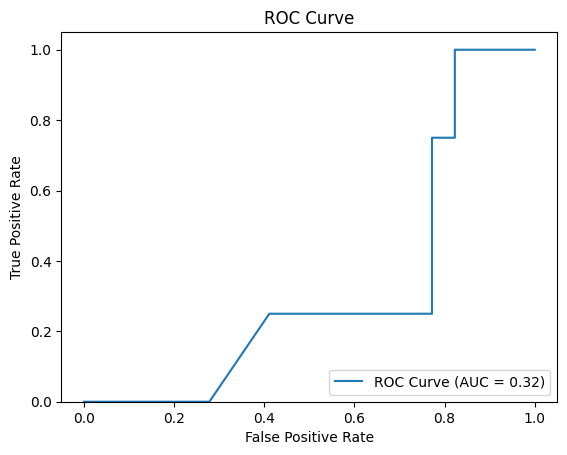

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, preds)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)

plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()